<a href="https://colab.research.google.com/github/Evansrintari/CollectionMiniProject/blob/master/heart_disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_csv("/content/sample_data/heart.csv" )

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# cp - chest_pain (4_values)
# value 0: typical angina
# value 1 Atypical angina
# value 2: non-anginal pain
# value 3 : asymptomatic
# trestbps = resting blood pressure (in mm Hg on admission to the hospital)
# chol serum cholestrol
# fbs fasting blood sugar 120mg/dl (1=true, 0=false)
# restecg - resting electocardiographic result
# value 0 normal
# value 1 having st
# value 2 showing probal
# thalach max heart rate achieved
# exang = exersice induced angina(1 = yes; 0 = no)
# slope = the slope of the peak exer ST segment
# val1 = upsloping
# val2 flat
# val3 downslop
# ca - number of major vessels clolred flourosopy
# thal 3 = normal 6=fixed detect 7 = reversable
# target  = 0 high chance 1 low chance



In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
data.shape

(1025, 14)

In [8]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])


Number of rows 1025
Number of columns 14


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
# duplicate data
data_dup = data.duplicated().any()
# print(data_dup)
data_dup

True

In [12]:
# droping duplicate data
data=data.drop_duplicates()


In [ ]:
data.shape


(302, 14)

In [13]:
# overall statics about dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

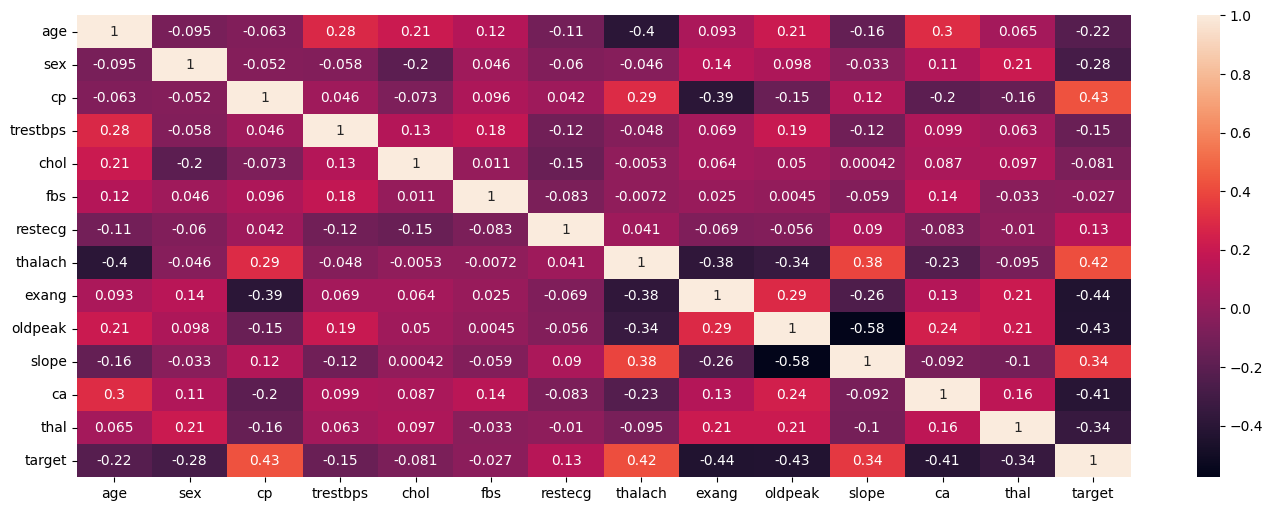

In [14]:
# draw correlation matrix
# data.corr()
plt.figure(figsize = (17, 6))
sns.heatmap(data.corr(), annot= True)

In [15]:
# How many people have heart disease, and how many dont have
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
data['target'].value_counts()

,count
target,
1,164
0,138


<Axes: xlabel='target', ylabel='count'>

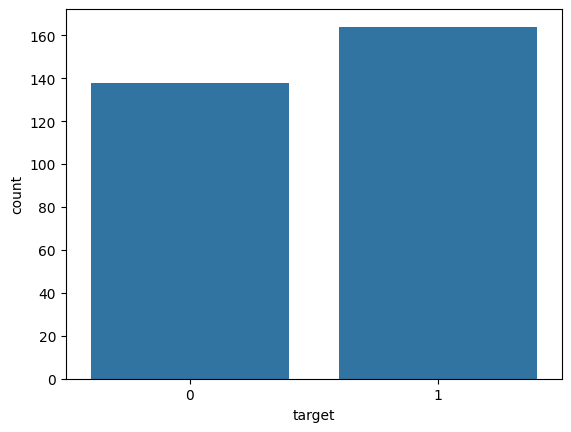

In [32]:
sns.countplot(x='target', data=data)


In [19]:
# Count of males and females
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
data['sex'].value_counts()

,count
sex,
1,206
0,96


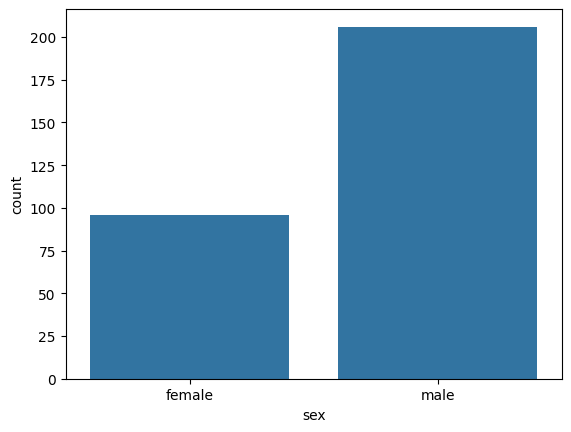

In [30]:
sns.countplot(x="sex", data=data)
plt.xticks([0,1], ['female', 'male'])
plt.show()

In [26]:
# find distribution according to the target value
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

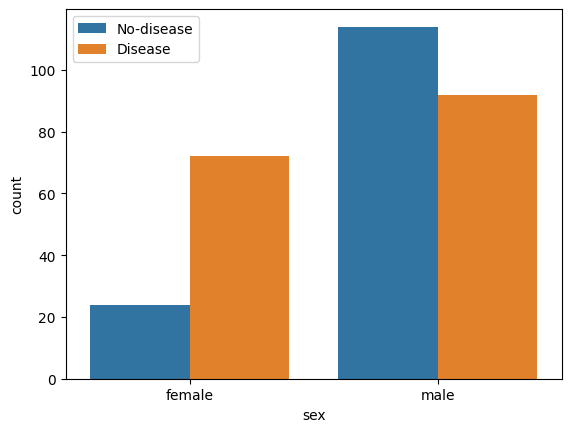

In [34]:
sns.countplot(x='sex', hue='target', data=data)
plt.xticks([0,1], ['female', 'male'])
plt.legend(labels=['No-disease', 'Disease'])

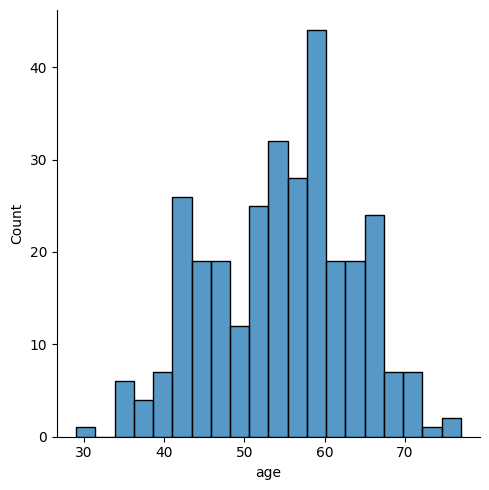

In [38]:
# check Age Distributionin dataset
# histplot
sns.displot(data['age'],bins =20)
plt.show()

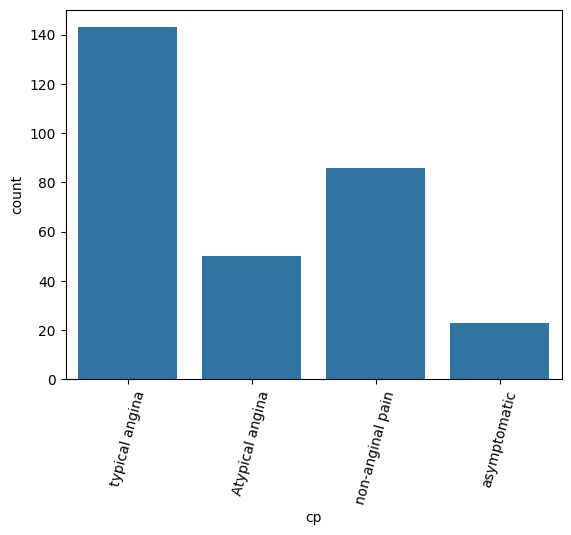

In [44]:
# check pain type typical angina
# value 1 Atypical angina
# value 2: non-anginal pain
# value 3 : asymptomatic
sns.countplot(x='cp', data=data)
plt.xticks(rotation=75)
plt.xticks([0,1,2,3],['typical angina','Atypical angina','non-anginal pain','asymptomatic'])
plt.show()

In [45]:
# solving chest pain as per target variable
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

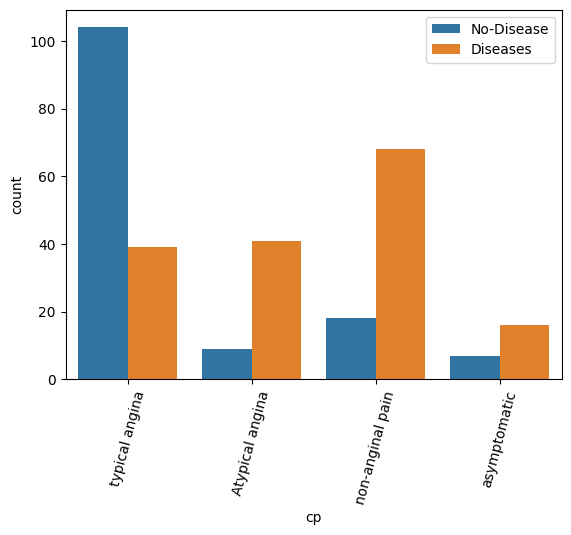

In [49]:
sns.countplot(x = "cp", hue = 'target', data=data)
plt.legend(labels=["No-Disease", "Diseases"])
plt.xticks(rotation=75)
plt.xticks([0,1,2,3],['typical angina','Atypical angina','non-anginal pain','asymptomatic'])
plt.show()

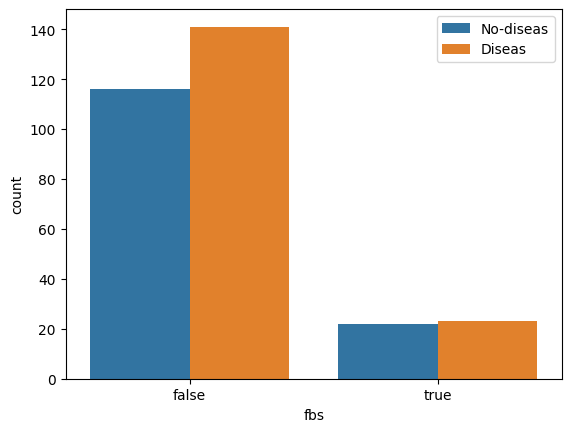

In [55]:
# # solving fasting blood as per target variable
sns.countplot (x='fbs', hue ='target', data=data)
plt.legend(labels=["No-diseas","Diseas"])
plt.xticks([0,1], ["false", "true"])
plt.show()